## Name : L.H.T.V.Jayawardane
## Index : 190274B

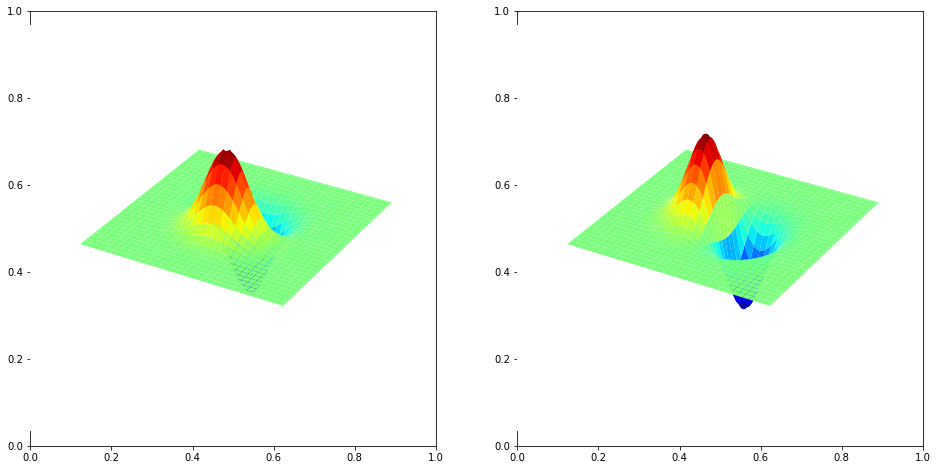

In [4]:
#Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')

delta= 0.1
xx,yy=np.meshgrid(np.arange(-5,delta+5,delta),np.arange(-5,delta+5,delta))

sigma=1
g=np.exp(-(xx**2 + yy**2)/(2*sigma**2))
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
g_x=cv.filter2D(g,-1,sobel_v)
sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
g_y=cv.filter2D(g,-1,sobel_h)

surf1 = ax1.plot_surface(xx,yy,g_x,cmap=cm.jet,linewidth=0,antialiased=True)
surf2 = ax2.plot_surface(xx,yy,g_y,cmap=cm.jet,linewidth=0,antialiased=True)
ax1.axis('off')
ax2.axis('off')
plt.show()


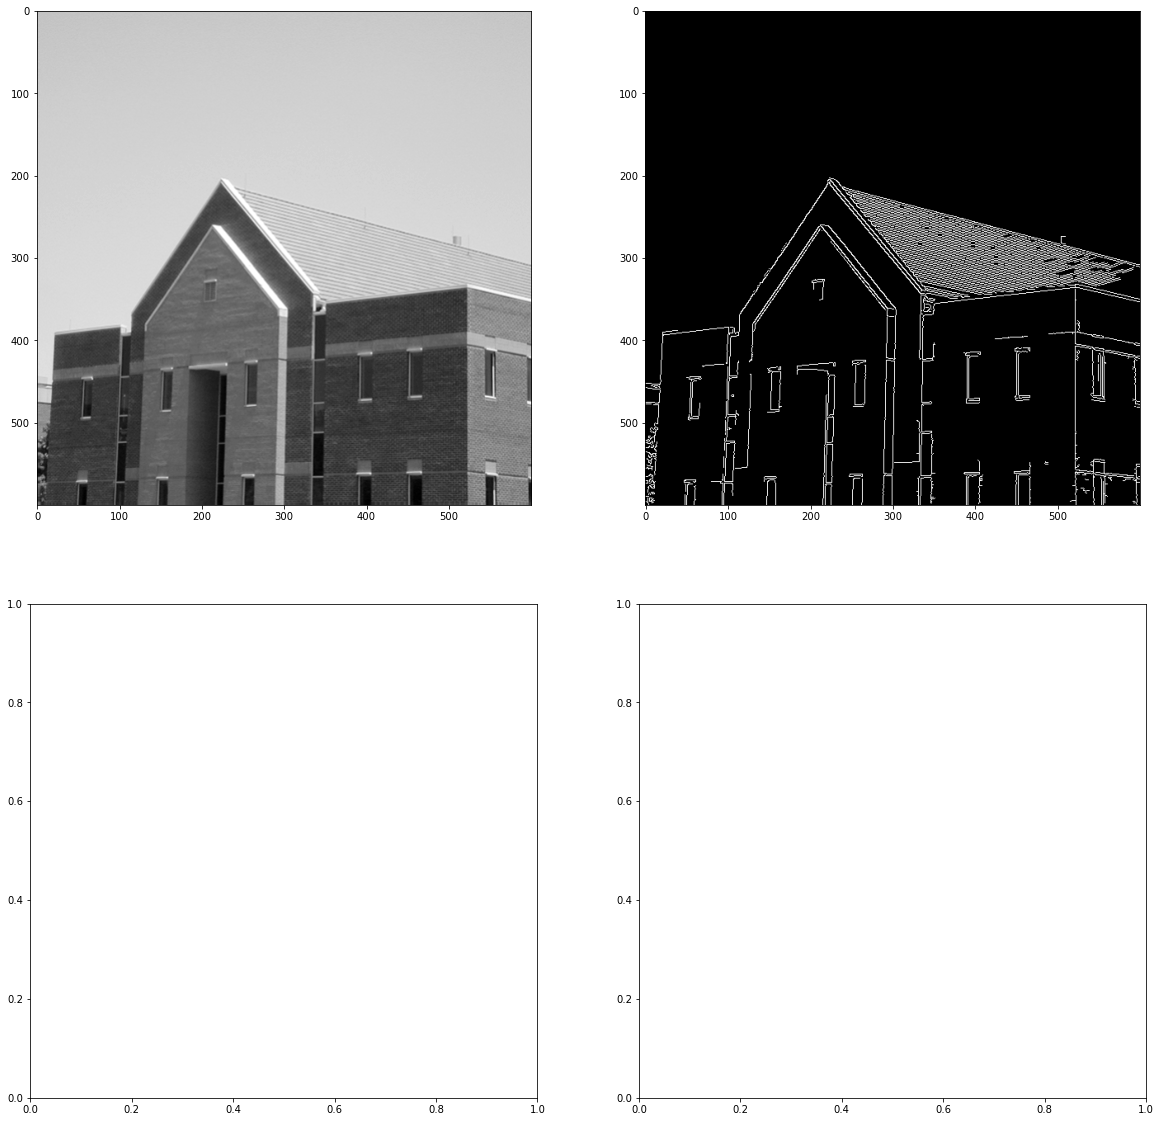

In [5]:
#Q4
img = cv.imread(r'C:\Users\Acer\Desktop\sem 4\Fundamentals of Image Processing\images\building.tif', cv.IMREAD_GRAYSCALE)
assert img is not None

edges = cv.Canny(img, 100, 200)

fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].imshow(img,cmap='gray')
ax[0,1].imshow(edges,cmap='gray')
plt.show()
